<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

---

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [2]:
seeds = pd.read_csv("./datasets/seeds.csv")

In [3]:
# Taking a peek
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Do some EDA of relationships between features.

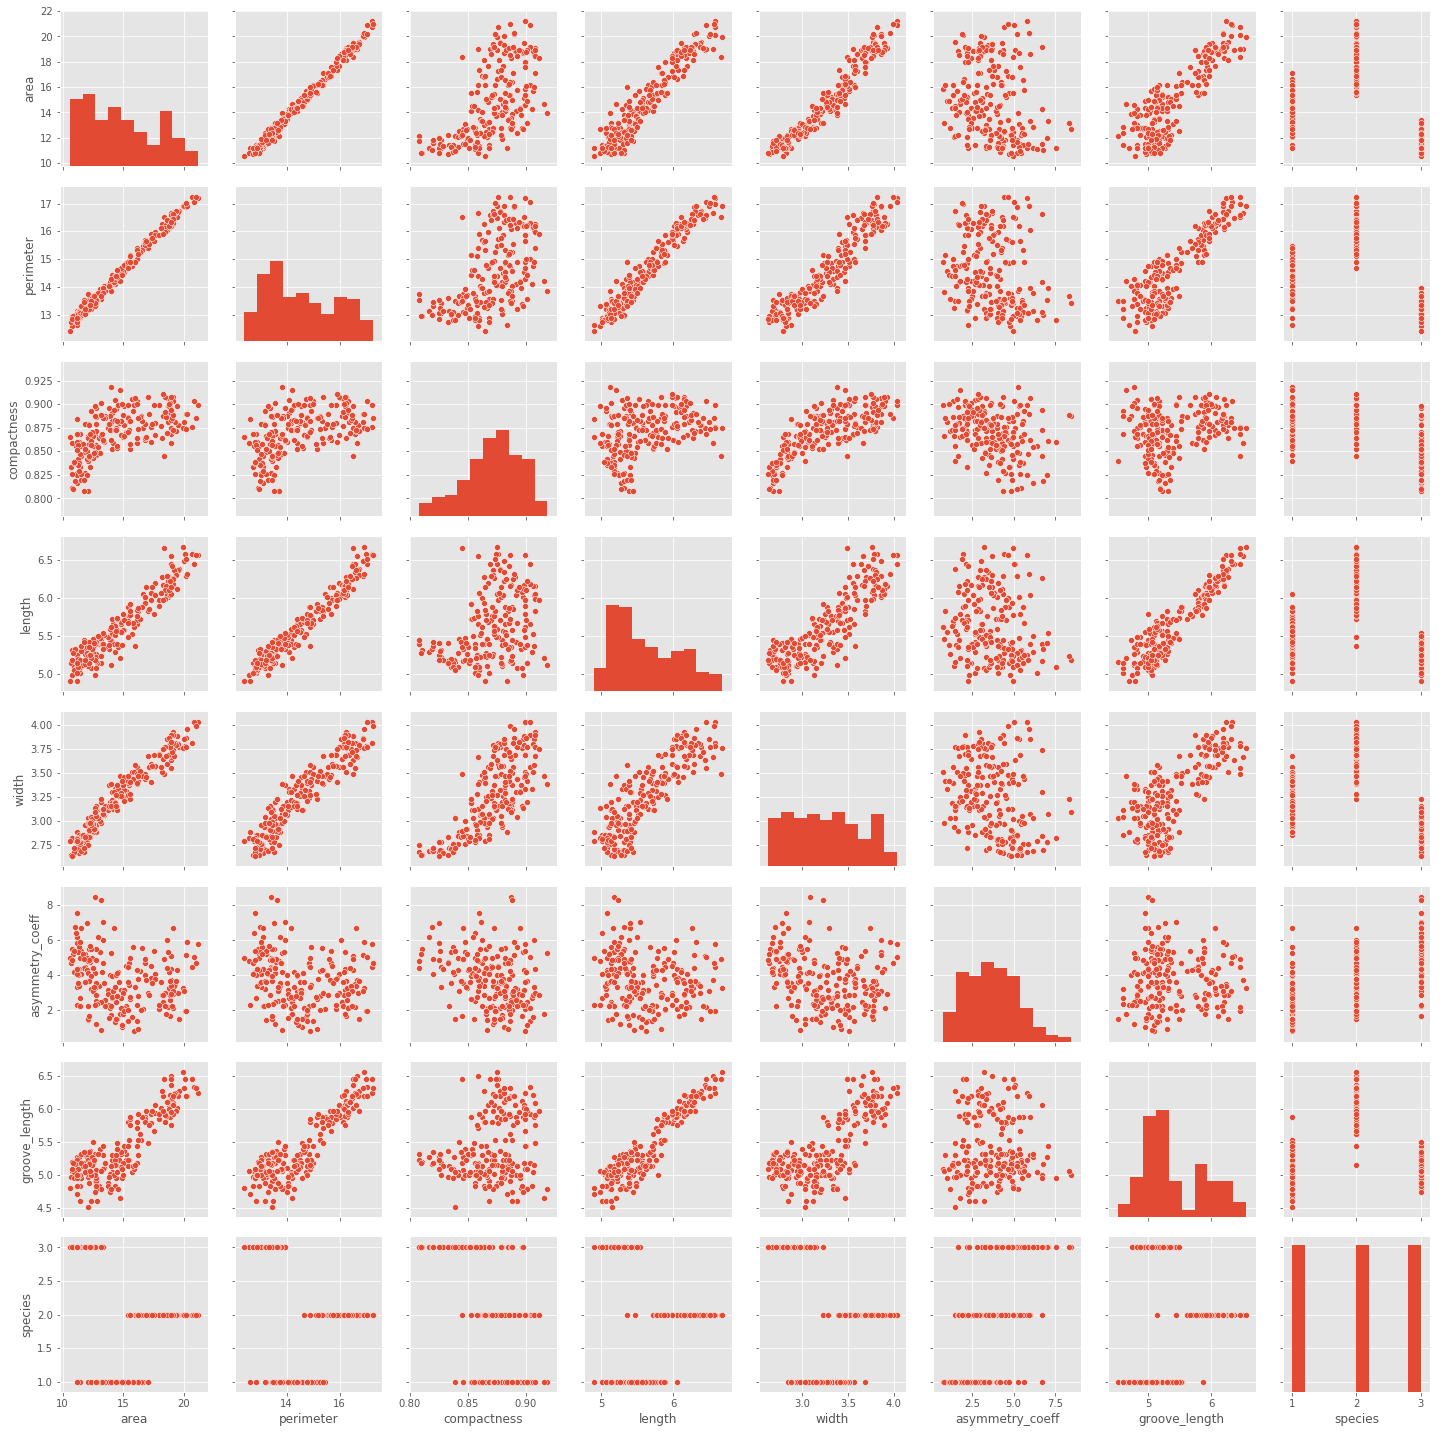

In [4]:
# Plot the Data to see the distributions/relationships
import seaborn as sns

# Plot without the "species" hue.
sns.pairplot(seeds)

In [5]:
# Check for nulls
seeds.isnull().sum()
# there is a value for every position in the DF

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

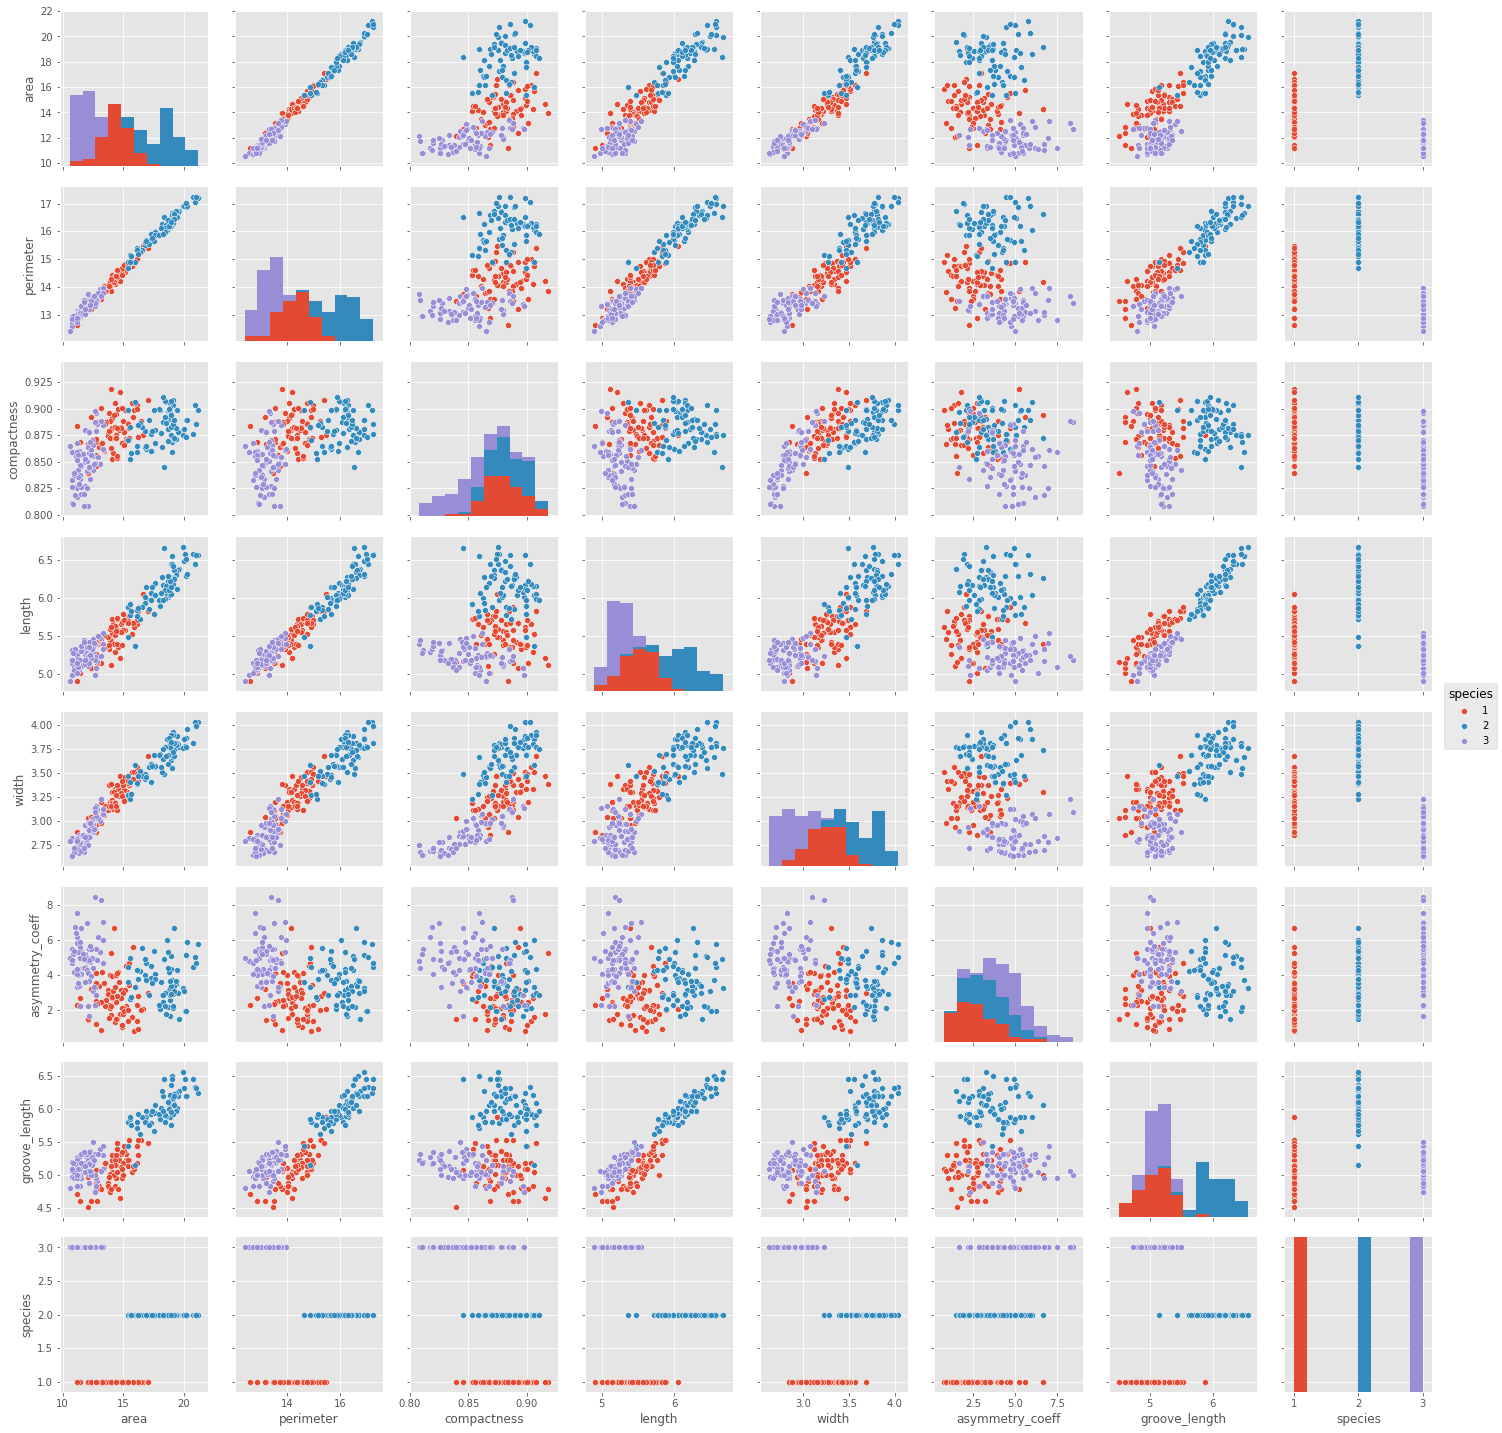

In [6]:
# Look at the real species labels.
sns.pairplot(data=seeds, hue='species')
# classea appear to have a similar number of samples.
# Blue consistently looks like the divisor between the green and red classes.

In [7]:
seeds.species.value_counts()
# all classes are equally distributed. 

3    70
2    70
1    70
Name: species, dtype: int64

In [8]:
# Check datatypes
seeds.dtypes
# We got an odd-ball, that species guy.

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
groove_length      float64
species              int64
dtype: object

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [9]:
# drop 'species', which is currently acting as a target (categorical)
X = seeds.drop('species', axis = 1)
y = seeds.species

In [10]:
# Scale the data
from sklearn.preprocessing import normalize

Xn = normalize(X)

In [22]:
Xn

array([[ 0.66271789,  0.64447795,  0.03782617, ...,  0.14383497,
         0.09645455,  0.22669642],
       [ 0.66410726,  0.65027169,  0.03932425, ...,  0.14875467,
         0.04543422,  0.22119056],
       [ 0.65688362,  0.64769001,  0.0416011 , ...,  0.15339543,
         0.1240678 ,  0.2217959 ],
       ..., 
       [ 0.59378277,  0.6144752 ,  0.03995888, ...,  0.14538681,
         0.37403816,  0.22743679],
       [ 0.60059997,  0.67009507,  0.04322392, ...,  0.14385993,
         0.1825134 ,  0.25586371],
       [ 0.59752179,  0.64804396,  0.04218601, ...,  0.14447397,
         0.27383987,  0.24595552]])

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. Lets try using 2, 4 and 6 cluster splits. Run the clustering algorithm with each of those k values.

In [11]:
from sklearn.cluster import KMeans

# 2 Clusters
k_mean2 = KMeans(n_clusters=2)
k_mean2.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
# 4 Clusters
k_mean4 = KMeans(n_clusters=4)
k_mean4.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
# 6 Clusters
k_mean6 = KMeans(n_clusters=6)
k_mean6.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 5. Get the labels and centroids for the models

In [14]:
# Labels and centroids for 2 Clusters
labels_2 = k_mean2.labels_
print (labels_2)
clusters_2 = k_mean2.cluster_centers_
clusters_2

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0]


array([[ 0.59452087,  0.65538982,  0.04178222,  0.2581907 ,  0.14176089,
         0.24787804,  0.25185439],
       [ 0.66929175,  0.63185432,  0.03700914,  0.24244146,  0.14335061,
         0.12355609,  0.2308226 ]])

In [15]:
# Labels and centroids for 4 Clusters

labels_4 = k_mean4.labels_
print (labels_4)
clusters_4 = k_mean4.cluster_centers_
clusters_4

[3 3 2 2 3 2 2 2 3 3 0 3 2 2 2 0 1 3 3 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2 3 3 3
 3 2 1 2 2 2 0 2 3 3 2 2 3 2 0 2 2 3 3 2 3 3 2 2 2 2 2 3 2 3 2 3 2 0 0 0 3
 0 0 0 0 0 3 0 0 0 3 3 3 3 0 0 0 3 3 3 0 0 0 3 3 3 3 0 3 0 3 3 3 3 0 3 3 3
 0 3 0 0 3 0 3 0 3 0 0 0 3 0 0 0 3 3 0 3 3 0 0 0 0 0 3 3 0 1 1 1 1 1 1 2 1
 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 2 1 1 2 2 1 1 2 1]


array([[ 0.68246421,  0.6127239 ,  0.03410852,  0.23350594,  0.13945332,
         0.17492916,  0.22699804],
       [ 0.58749248,  0.65603307,  0.04202818,  0.2591535 ,  0.14127454,
         0.26205395,  0.25328319],
       [ 0.62964512,  0.65917694,  0.04168419,  0.2560187 ,  0.14733339,
         0.14278529,  0.2404358 ],
       [ 0.68411419,  0.62573478,  0.03575389,  0.23941461,  0.14252311,
         0.086917  ,  0.22870161]])

In [16]:
# Labels and centroids for 6 Clusters

labels_6 = k_mean6.labels_
print (labels_6)
clusters_6 = k_mean6.cluster_centers_
clusters_6

[5 5 5 5 1 5 3 5 1 1 3 5 0 0 5 3 4 1 5 0 5 5 1 5 5 1 0 5 5 0 5 3 0 5 5 1 5
 1 5 2 5 5 5 3 5 5 5 5 5 5 0 3 0 0 5 5 5 5 5 5 0 0 0 0 5 5 5 5 5 0 3 3 3 1
 3 3 3 3 3 1 3 3 3 1 1 1 1 1 3 3 1 1 1 3 3 3 1 1 1 1 3 1 3 1 1 1 1 3 1 1 1
 1 1 3 3 1 3 1 1 1 3 3 3 1 3 3 3 1 1 3 1 1 3 3 3 3 3 5 5 3 4 2 4 4 4 2 0 4
 0 4 4 2 4 0 4 2 0 4 4 4 0 4 4 4 2 5 4 0 4 0 2 2 4 4 4 4 4 4 2 5 4 4 4 4 2
 4 4 4 2 4 4 4 0 4 0 4 4 4 0 0 4 5 4 2 0 0 4 2 0 4]


array([[ 0.61622015,  0.66296316,  0.04225883,  0.25949803,  0.1455951 ,
         0.16862596,  0.24668962],
       [ 0.69834786,  0.61280783,  0.03385641,  0.23359351,  0.14070768,
         0.09476547,  0.22650062],
       [ 0.57884274,  0.64010238,  0.04091162,  0.25322689,  0.13919757,
         0.32754603,  0.24652699],
       [ 0.67996365,  0.61456559,  0.03444849,  0.23416328,  0.13985289,
         0.17678979,  0.22715437],
       [ 0.58977606,  0.66082461,  0.0423485 ,  0.26094006,  0.14174804,
         0.24311488,  0.25545279],
       [ 0.64848998,  0.65331521,  0.04036825,  0.25189994,  0.14773613,
         0.09887603,  0.23388824]])

### 6. Compute the Silhouette Score to evaluate your clustering models

Silhouette score ranges from -1 to 1, with 1 being the best.

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
# A Silhouette of 0.5 is not bad considering the range for scores is -1 to 1.
silhouette_score(Xn, labels_2)

0.50144852045607868

In [19]:
# Double our clusters saw a pretty large drop in silhouette score.
silhouette_score(Xn, labels_4)

0.38175546074372047

In [20]:
# A further addition of 2 clsuters dropped out score again but by as much.
silhouette_score(Xn, labels_6)

0.36001741944345794

### 7. Plot `length` vs. `groove_length` using the clusters from each model.

Each time, compare to the actual species classification.


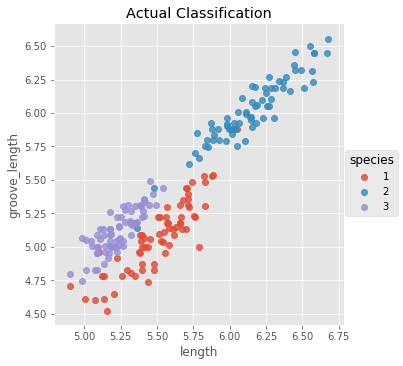

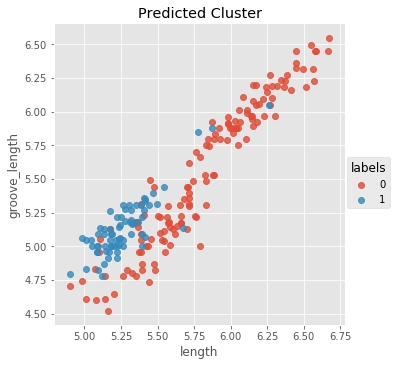

In [22]:
#length x groove_length
seeds2 = seeds
seeds2['labels'] = labels_2

sns.lmplot(x='length', y='groove_length', data=seeds2, hue="species", fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds2, hue="labels", fit_reg=False)
plt.title('Predicted Cluster')

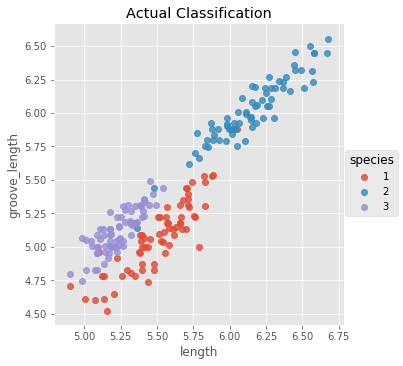

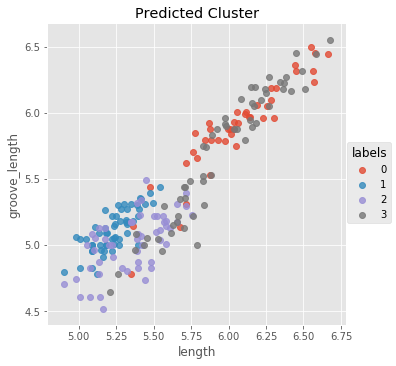

In [23]:
seeds4 = seeds
seeds4['labels'] = labels_4

sns.lmplot(x='length', y='groove_length', data=seeds4, hue='species',fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds4, hue='labels',fit_reg=False)
plt.title('Predicted Cluster')

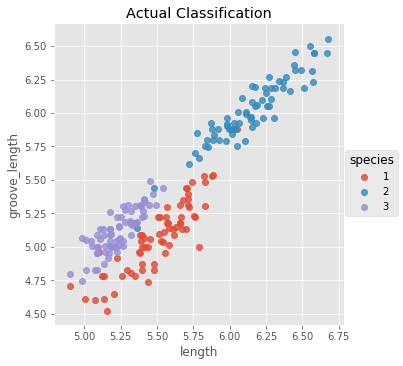

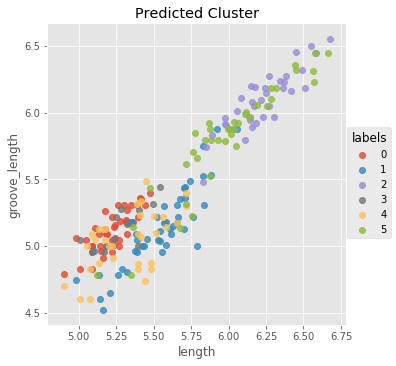

In [24]:
seeds6 = seeds
seeds6['labels'] = labels_6

sns.lmplot(x='length', y='groove_length', data=seeds6, hue='species',fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds6, hue='labels',fit_reg=False)
plt.title('Predicted Cluster')

### 8. Evaluate a K-Means model with `k=3` clusters.

1. Construct the model.
- Print the labels and centroids.
- Evaluate the model with silhouette score.
- Plot `length` vs. `groove_length` and compare the clusters to the actual species.

In [26]:
k_mean3 = KMeans(n_clusters=3)
k_mean3.fit(Xn)

labels_3 = k_mean3.labels_
print (labels_3)
clusters_3 = k_mean3.cluster_centers_
clusters_3

[2 2 2 2 2 2 0 2 2 2 0 2 0 0 0 0 1 2 2 1 0 2 2 2 2 2 0 2 2 0 2 0 0 2 2 2 2
 2 0 1 2 2 2 0 0 2 2 2 2 2 0 0 0 0 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2 0 0 0 0 2
 0 0 0 0 0 2 0 0 0 2 2 2 2 0 0 0 2 2 2 0 0 0 2 2 2 2 0 2 0 2 2 2 2 0 2 2 2
 0 2 0 0 2 0 2 0 2 0 0 0 2 0 0 0 2 2 0 2 2 0 0 0 0 0 2 2 0 1 1 1 1 1 1 2 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 2 1 1 1 0 1 1 1 1]


array([[0.66509806, 0.62750951, 0.03646614, 0.24114117, 0.1415701 ,
        0.16937951, 0.23066162],
       [0.5890222 , 0.65769788, 0.04218078, 0.25964956, 0.14174127,
        0.25228245, 0.25373376],
       [0.67054001, 0.63555118, 0.03754245, 0.24369327, 0.14465753,
        0.09404806, 0.2312844 ]])

In [27]:
silhouette_score(Xn, labels_3)

0.3602938556104591

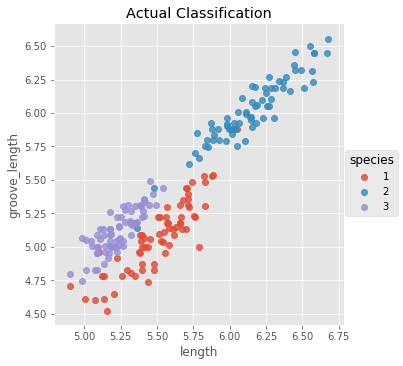

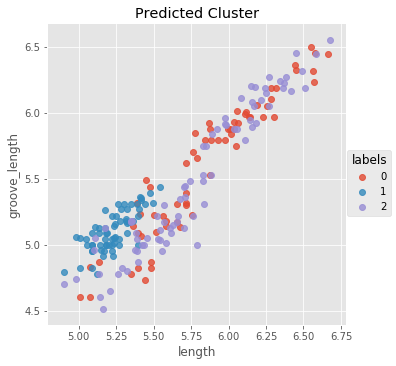

In [28]:
seeds3 = seeds
seeds3['labels']=labels_3

sns.lmplot(x='length', y='groove_length', data=seeds3, hue='species',fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds3, hue='labels',fit_reg=False)
plt.title('Predicted Cluster')